In [1]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("ETH_USD_2015-08-09_2021-07-29-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-09,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,1.266023,0.850151,1.266023,0.850151
...,...,...,...,...,...
2021-07-25,ETH,2167.821498,2124.998501,2200.929807,2106.546966
2021-07-26,ETH,2161.052224,2186.836377,2196.240513,2109.197417
2021-07-27,ETH,2225.740338,2191.760797,2431.124400,2173.806296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2015-08-09 to 2021-07-29
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2167 non-null   object 
 1   Closing Price (USD)  2167 non-null   float64
 2   24h Open (USD)       2167 non-null   float64
 3   24h High (USD)       2167 non-null   float64
 4   24h Low (USD)        2167 non-null   float64
dtypes: float64(4), object(1)
memory usage: 101.6+ KB


In [5]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2167.000000,2167.000000,2167.000000,2167.000000
mean,401.778084,400.881804,417.540962,381.501185
std,623.198818,622.010473,650.574426,588.623262
min,0.428394,0.428394,0.490282,0.416424
25%,13.737184,13.693326,14.305215,13.172584
50%,198.977351,198.823019,204.534000,191.340458
75%,394.441686,394.363925,408.842600,381.095583
max,4132.757546,4179.931743,4382.725834,3940.061711


In [6]:
# Only want closing price for each day 
eth_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
eth_prices.head()

,Price
Date,
2015-08-09,0.909046
2015-08-10,0.692321
2015-08-11,0.668067
2015-08-12,0.850151
2015-08-13,1.266023


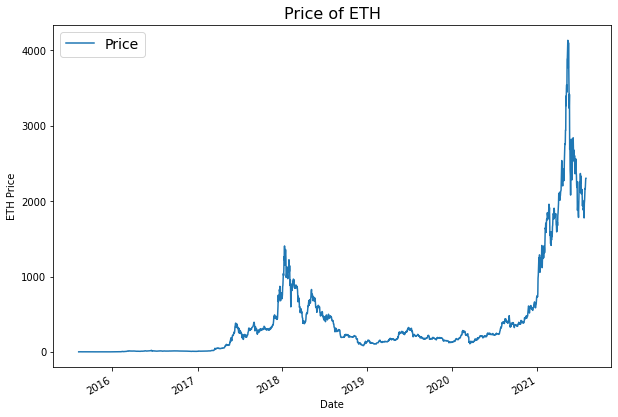

In [7]:
import matplotlib.pyplot as plt
eth_prices.plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of ETH", fontsize=16)
plt.legend(fontsize=14);

In [8]:
# Only want closing price for each day 
prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
timesteps = pd.DataFrame(df.index)
prices.head(), timesteps.head()

(               Price
 Date                
 2015-08-09  0.909046
 2015-08-10  0.692321
 2015-08-11  0.668067
 2015-08-12  0.850151
 2015-08-13  1.266023,
         Date
 0 2015-08-09
 1 2015-08-10
 2 2015-08-11
 3 2015-08-12
 4 2015-08-13)

In [9]:
# Get bitcoin date array
timesteps = eth_prices.index.to_numpy()
prices = eth_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2015-08-09T00:00:00.000000000', '2015-08-10T00:00:00.000000000',
        '2015-08-11T00:00:00.000000000', '2015-08-12T00:00:00.000000000',
        '2015-08-13T00:00:00.000000000', '2015-08-14T00:00:00.000000000',
        '2015-08-15T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
        '2015-08-17T00:00:00.000000000', '2015-08-18T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.909046, 0.692321, 0.668067, 0.850151, 1.266023, 1.95146 ,
        1.591219, 1.693707, 1.423244, 1.199595]))

In [10]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1733, 434, 1733, 434)

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

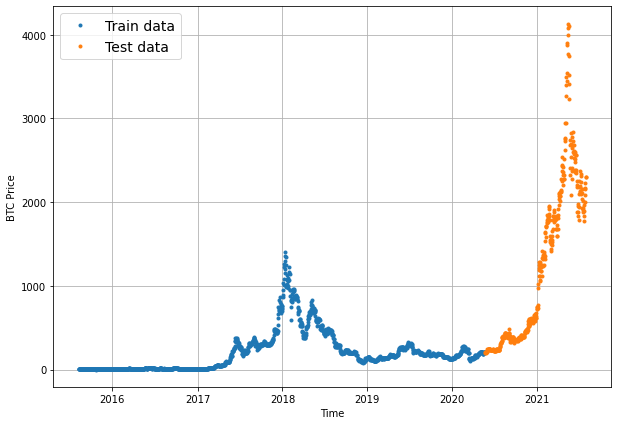

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [16]:
# Let's get TensorFlow! 
import tensorflow as tf

In [19]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

In [20]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [21]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [22]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    """
    Creates labels for windowed dataset.

    E.g. if horizon=1 (default)
    Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [23]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [24]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    # print(f"Window step:\n {window_step}")

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
    # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [26]:
import numpy as np

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2160, 2160)

In [27]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [28]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1728, 432, 1728, 432)

In [30]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path=".modelcheckpoint/model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


In [31]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
14/14 [==============================] - 0s 12ms/step - loss: 88.3835 - mae: 88.3835 - val_loss: 143.7400 - val_mae: 143.7400
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 27.0202 - mae: 27.0202 - val_loss: 119.7230 - val_mae: 119.7230
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 16.8745 - mae: 16.8745 - val_loss: 84.1055 - val_mae: 84.1055
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 14.2313 - mae: 14.2313 - val_loss: 81.5398 - val_mae: 81.5398
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 13.7378 - mae: 13.

Epoch 45/100
14/14 [==============================] - 0s 3ms/step - loss: 9.0622 - mae: 9.0622 - val_loss: 54.5412 - val_mae: 54.5412
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 46/100
14/14 [==============================] - 0s 3ms/step - loss: 9.7535 - mae: 9.7535 - val_loss: 59.3979 - val_mae: 59.3979
Epoch 47/100
14/14 [==============================] - 0s 3ms/step - loss: 10.3451 - mae: 10.3451 - val_loss: 54.3044 - val_mae: 54.3044
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 48/100
14/14 [==============================] - 0s 3ms/step - loss: 8.8223 - mae: 8.8223 - val_loss: 54.9269 - val_mae: 54.9269
Epoch 49/100
14/14 [==============================] - 0s 3ms/step - loss: 9.0285 - mae: 9.0285 - val_loss: 54.1193 - val_mae: 54.1193
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets
Epoch 50/100
14/14 [==============================] - 0

Epoch 98/100
14/14 [==============================] - 0s 3ms/step - loss: 10.3887 - mae: 10.3887 - val_loss: 55.3618 - val_mae: 55.3618
Epoch 99/100
14/14 [==============================] - 0s 3ms/step - loss: 8.7254 - mae: 8.7254 - val_loss: 53.4101 - val_mae: 53.4101
Epoch 100/100
14/14 [==============================] - 0s 3ms/step - loss: 8.9161 - mae: 8.9161 - val_loss: 52.9517 - val_mae: 52.9517
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_1_dense/assets


In [32]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

14/14 [==============================] - 0s 619us/step - loss: 52.9517 - mae: 52.9517


[52.951663970947266, 52.951663970947266]

In [33]:
def make_preds(model, input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    ----------
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [34]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(432,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([208.44615, 208.90512, 207.49724, 204.57616, 202.86662, 206.61192,
        216.25699, 221.60905, 241.5721 , 236.13994], dtype=float32)>)

In [35]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 52.95168,
 'mse': 9233.522,
 'rmse': 96.09122,
 'mape': 3.7896605,
 'mase': 1.011261}

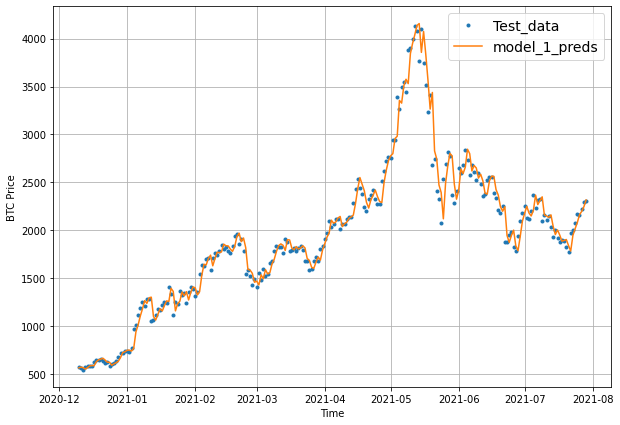

In [43]:
offset = 200
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


In [53]:
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [54]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - eth_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - eth_prices.index[0]).days
block_reward_3_days

1737

In [55]:
# Add block_reward column
eth_prices_block = eth_prices.copy()
eth_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
eth_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
eth_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
eth_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
eth_prices_block.head()

,Price,block_reward
Date,,
2015-08-09,0.909046,25
2015-08-10,0.692321,25
2015-08-11,0.668067,25
2015-08-12,0.850151,25
2015-08-13,1.266023,25


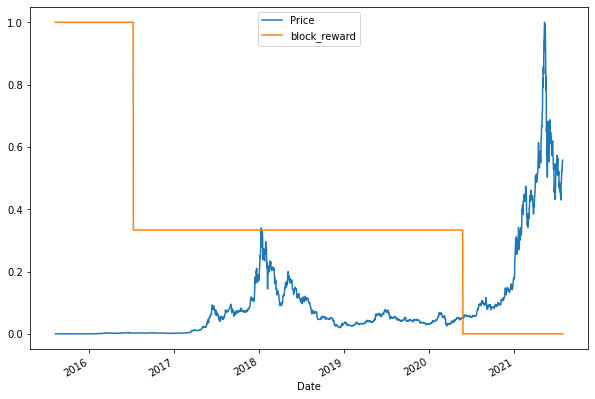

In [58]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(eth_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=eth_prices_block.columns,
                                     index=eth_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [59]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [60]:
# Make a copy of the Bitcoin historical data with block reward feature
eth_prices_windowed = eth_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    eth_prices_windowed[f"Price+{i+1}"] = eth_prices_windowed["Price"].shift(periods=i+1)
eth_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2015-08-09,0.909046,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-10,0.692321,25,0.909046,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-11,0.668067,25,0.692321,0.909046,NaN,NaN,NaN,NaN,NaN
2015-08-12,0.850151,25,0.668067,0.692321,0.909046,NaN,NaN,NaN,NaN
2015-08-13,1.266023,25,0.850151,0.668067,0.692321,0.909046,NaN,NaN,NaN
2015-08-14,1.951460,25,1.266023,0.850151,0.668067,0.692321,0.909046,NaN,NaN
2015-08-15,1.591219,25,1.951460,1.266023,0.850151,0.668067,0.692321,0.909046,NaN
2015-08-16,1.693707,25,1.591219,1.951460,1.266023,0.850151,0.668067,0.692321,0.909046
2015-08-17,1.423244,25,1.693707,1.591219,1.951460,1.266023,0.850151,0.668067,0.692321


In [61]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = eth_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = eth_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2015-08-16,25.0,1.591219,1.951460,1.266023,0.850151,0.668067,0.692321,0.909046
2015-08-17,25.0,1.693707,1.591219,1.951460,1.266023,0.850151,0.668067,0.692321
2015-08-18,25.0,1.423244,1.693707,1.591219,1.951460,1.266023,0.850151,0.668067
2015-08-19,25.0,1.199595,1.423244,1.693707,1.591219,1.951460,1.266023,0.850151
2015-08-20,25.0,1.182837,1.199595,1.423244,1.693707,1.591219,1.951460,1.266023


In [62]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1728, 1728, 432, 432)

In [63]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(X_train,
            y_train,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: .modelcheckpoint/model_experiments/model_4_co

In [65]:
# Load in best performing Conv1D model and evaluate it on the test data

model_4.evaluate(X_test, y_test)

14/14 [==============================] - 0s 922us/step - loss: 53.3214


53.321434020996094

In [67]:
# Make predictions
model_4_preds = make_preds(model_4, X_test)
model_4_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([208.17897, 209.12755, 207.63539, 204.48573, 203.0226 , 206.27089,
       215.72557, 221.1686 , 240.82597, 236.1614 ], dtype=float32)>

In [68]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 53.321434,
 'mse': 9236.539,
 'rmse': 96.10692,
 'mape': 3.8012524,
 'mase': 1.0183225}